# Chapter 3

## 3.1

Consider the National Football League data in Table B.1.
1. Fit a multiple linear regression model relating the number of games won
to the team’s passing yardage ($x_2$), the percentage of rushing plays ($x_7$), and the opponents’ yards rushing ($x_8$).
2. Construct the analysis-of-variance table and test for significance of regression.
3. Calculate $t$ statistics for testing the hypotheses $H0: b_2 = 0$, $H0: b_7 = 0$, and $H0: b_8 = 0$. What conclusions can you draw about the roles the variables $x_2, x_7,$ and $x_8$ play in the model?
4. Calculate $R^2$ and $R^2_{Adj}$ for this model.
5. Using the partial $F$ test, determine the contribution of $x_7$ to the model. How is this partial $F$ statistic related to the $t$ test for $b_7$ calculated in part c above?

In [2]:
import pandas as pd
import linear_regression as lr
import numpy as np
import matplotlib.pyplot as plt

problem_1_dataset = pd.read_csv("datasets/b1.csv")
problem_1_dataset = problem_1_dataset[["x2", "x7", "x8", "y"]]

p1_x = np.array(problem_1_dataset[["x2", "x7", "x8"]].values)
p1_y = np.array(problem_1_dataset[["y"]].values).ravel()

model1 = lr.MultipleLinearRegression(X=p1_x, y=p1_y)
print("Least square estimators for the model parameters: ")
print("  - intercept: ", model1._parameters[0])
print("  - x2: ", model1._parameters[1])
print("  - x7: ", model1._parameters[2])
print("  - x8: ", model1._parameters[3])

Least square estimators for the model parameters: 
  - intercept:  -1.808372058706027
  - x2:  0.0035980702139767617
  - x7:  0.19396020958323845
  - x8:  -0.004815493970050266


Analysis of variance identity breakdown:
  - total sum of squares (SST): 326.96,
  - regression sum of squares (SSR): 257.09,
  - residual sum of squares (SSRes): 69.87,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The H0 hypothesis being tested is: b1 = b2 = ... = bp = 0.
The F-statistic is: 30.66
The 0.95 quantile of the F-distribution with 2 and 25 degrees of freedom is: 3.39
The model is significant; the hypothesis H0: b1 = b2 = ... = bp = 0 is rejected.

The figure below shows the PDF for the F(p-1, n-p) distribution, and the value of the F-statistic, along with the 95% quantile.


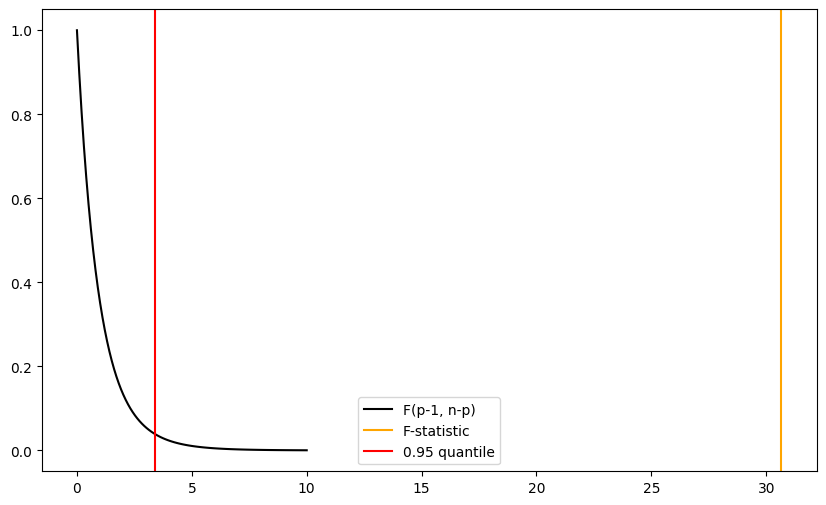

In [3]:
model1.analysis_of_variance()

In [4]:
model1.individual_parameter_significance()

#------------------------------------------------------------------
Running the t-test for significance of parameter b0...
   - value of t statistic:  -0.23360268930790606
   - value of t statistic boundary:  2.0595385527532946
   - H0 hypothesis b0 = 0 is: NOT REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b1...
   - value of t statistic:  5.283845600131552
   - value of t statistic boundary:  2.0595385527532946
   - H0 hypothesis b1 = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b2...
   - value of t statistic:  2.243591434971227
   - value of t statistic boundary:  2.0595385527532946
   - H0 hypothesis b2 = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b3...
   - value of t statistic:  -3.848797961737942
   - value of t statistic bo

In [5]:
model1.coefficient_of_determination_analysis(verbose = True)

The coefficient of determination R^2 is: 0.79
The adjusted coefficient of determination R^2 is: 0.77


{'r2': 0.7863069233111879, 'r2_adj': 0.769211477176083}

## 3.5

Consider the gasoline mileage data in Table B.3.
1. Fit a multiple linear regression model relating gasoline mileage $y$ (miles per gallon) to engine displacement $x_1$ and the number of carburetor barrels $x_6$.
2. Construct the analysis-of-variance table and test for significance of regression.
3. Calculate $R^2$ and $R^2_{Adj}$ for this model. Compare this to the $R^2$ and the $R^2_{Adj}$ for the simple linear regression model relating mileage to engine displacement in Problem 2.4.
4. Find a 95% CI for $b_1$.
5. Compute the $t$ statistics for testing $H_0: b_1 = 0$ and $H_0: b_6 = 0$. What conclusions can you draw?
6. Find a 95% CI on the mean gasoline mileage when $x_1 = 275 in^3$ and $x_6 = 2$ barrels.
7. Find a 95% prediction interval for a new observation on gasoline mileage when $x_1 = 257 in^3$ and $x_6 = 2$ barrels.

In [6]:
df = pd.read_csv("datasets/b3.csv")[["x1", "x6", "y"]]

X_data = np.array(df[["x1", "x6"]].values)
y_data = np.array(df[["y"]].values).ravel()

model2 = lr.MultipleLinearRegression(X=X_data, y=y_data)
print(model2)


Multiple linear regression model trained on 32 observations with 2 parameters.
The estimated parameters are: 
   - b0: 31.08
   - b1: -0.05
   - b2: 1.24



Analysis of variance identity breakdown:
  - total sum of squares (SST): 1301.11,
  - regression sum of squares (SSR): 710.78,
  - residual sum of squares (SSRes): 590.32,

Assuming that the errors are normally distributed, we can use the F-test to check if the model is significant.
The H0 hypothesis being tested is: b1 = b2 = ... = bp = 0.
The F-statistic is: 18.06
The 0.95 quantile of the F-distribution with 1 and 30 degrees of freedom is: 4.17
The model is significant; the hypothesis H0: b1 = b2 = ... = bp = 0 is rejected.

The figure below shows the PDF for the F(p-1, n-p) distribution, and the value of the F-statistic, along with the 95% quantile.


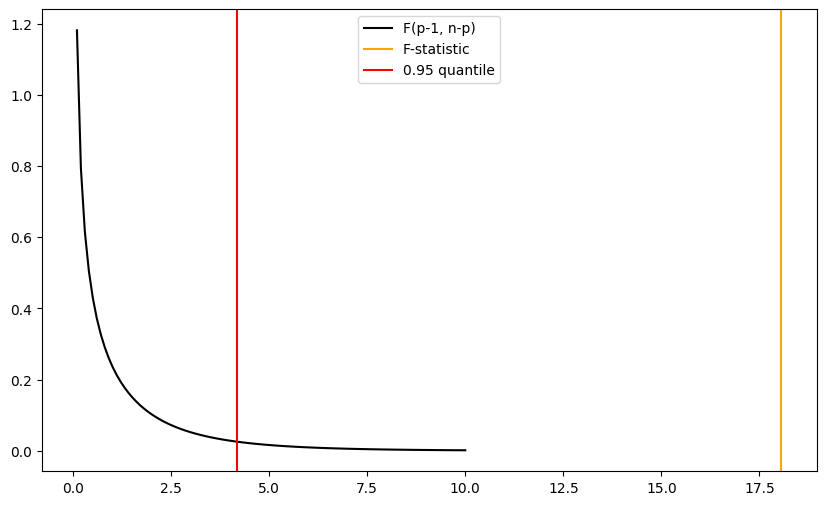

In [7]:
model2.analysis_of_variance()

In [8]:
r2 = model2.coefficient_of_determination_analysis(verbose = True)

The coefficient of determination R^2 is: 0.55
The adjusted coefficient of determination R^2 is: 0.53


In [9]:
b1_ll, b1_ul = model2.regressor_parameter_confidence_interval(j = 1, alpha = 0.05)
print("The 95% confidence interval for the parameter b1 is: [", b1_ll, ", ", b1_ul, "]")

The 95% confidence interval for the parameter b1 is: [ -0.06589760203511737 ,  -0.02903846113159371 ]


In [10]:
model2.individual_parameter_significance()

#------------------------------------------------------------------
Running the t-test for significance of parameter b0...
   - value of t statistic:  13.737409760795696
   - value of t statistic boundary:  2.042272456301238
   - H0 hypothesis b0 = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b1...
   - value of t statistic:  -5.260168906880667
   - value of t statistic boundary:  2.042272456301238
   - H0 hypothesis b1 = 0 is: REJECTED

#------------------------------------------------------------------
Running the t-test for significance of parameter b2...
   - value of t statistic:  1.260523306313764
   - value of t statistic boundary:  2.042272456301238
   - H0 hypothesis b2 = 0 is: NOT REJECTED



In [12]:
x1 = 275
x6 = 2

x_input = np.array([1, x1, x6])
mean_response_ll, mean_response_ul = model2.mean_response_confidence_interval(x_input, alpha = 0.05)
print("The 95% confidence interval for the mean response is: [", mean_response_ll, ", ", mean_response_ul, "]")

The 95% confidence interval for the mean response is: [ 18.57727034137411 ,  22.44490482436175 ]


In [13]:
prediction_ll, prediction_ul = model2.prediction_confidence_interval(x_input, alpha = 0.05)

In [14]:
print("The 95% prediction interval for the mean response is: [", prediction_ll, ", ", prediction_ul, "]")

The 95% prediction interval for the mean response is: [ 11.247627978573163 ,  29.774547187162696 ]
